In [1]:
import pandas as pd

# 파일을 로드합니다.
df = pd.read_csv("pet_food_customer_orders.csv")

# 1. customer_id별 레코드(주문 기록) 횟수를 계산합니다.
# 이 횟수는 해당 고객의 총 주문 건수를 나타냅니다.
customer_record_counts = df.groupby('customer_id').size()

# 2. 신규 유입 고객 (기록 횟수 = 1)
# 레코드 횟수가 1인 고객은 이 데이터셋에 한 번만 기록된 고객입니다.
new_customers = customer_record_counts[customer_record_counts == 1]
new_customer_count = new_customers.shape[0]

# 3. 장기고객 (기록 횟수 > 1)
# 레코드 횟수가 1을 초과하는 고객은 2회 이상의 주문 기록이 있는 고객입니다.
long_term_customers = customer_record_counts[customer_record_counts > 1]
long_term_customer_count = long_term_customers.shape[0]

# 4. 총 고객 수 계산
total_customers = customer_record_counts.shape[0]

# 5. 퍼센트 계산
new_customer_percent = (new_customer_count / total_customers) * 100
long_term_customer_percent = (long_term_customer_count / total_customers) * 100

print(f"총 고객 수: {total_customers}명")
print(f"신규 유입 고객 (기록 1회): {new_customer_count}명 ({new_customer_percent:.2f}%)")
print(f"장기고객 (기록 2회 이상): {long_term_customer_count}명 ({long_term_customer_percent:.2f}%)")

총 고객 수: 11168명
신규 유입 고객 (기록 1회): 1635명 (14.64%)
장기고객 (기록 2회 이상): 9533명 (85.36%)


In [2]:
import pandas as pd

# 파일을 로드합니다.
df = pd.read_csv("pet_food_customer_orders.csv")

# 1. customer_id별 레코드(주문 기록) 횟수를 계산합니다.
# 이 횟수가 해당 고객의 총 주문 건수를 나타냅니다.
customer_record_counts = df.groupby('customer_id').size()

# 2. 장기고객 ID 리스트 추출 (기록 횟수 > 1)
# 2회 이상의 주문 기록을 가진 고객 ID를 필터링합니다.
long_term_customer_ids = customer_record_counts[customer_record_counts > 1].index

# 3. 전체 데이터프레임에서 장기고객의 주문 기록만 필터링합니다.
long_term_df = df[df['customer_id'].isin(long_term_customer_ids)]

# 4. 필터링된 데이터프레임의 총 행 개수(주문 건수)를 계산합니다.
total_orders_by_long_term = long_term_df.shape[0]

print(f"장기고객 ID 수: {len(long_term_customer_ids)}명")
print(f"장기고객의 총 주문 건수: {total_orders_by_long_term}건")

장기고객 ID 수: 9533명
장기고객의 총 주문 건수: 47407건


In [3]:
import pandas as pd

# 파일을 로드합니다.
df = pd.read_csv("pet_food_customer_orders.csv")

# 1. customer_id별 레코드(주문 기록) 횟수를 계산합니다.
customer_record_counts = df.groupby('customer_id').size()

# 2. 신규 유입 고객 ID 리스트 추출 (기록 횟수 = 1)
# 1회의 주문 기록을 가진 고객 ID를 필터링합니다.
new_customer_ids = customer_record_counts[customer_record_counts == 1].index

# 3. 전체 데이터프레임에서 신규 유입 고객의 주문 기록만 필터링합니다.
new_customer_df = df[df['customer_id'].isin(new_customer_ids)]

# 4. 필터링된 데이터프레임의 총 행 개수(주문 건수)를 계산합니다.
total_orders_by_new_customer = new_customer_df.shape[0]

print(f"신규 유입 고객 ID 수: {len(new_customer_ids)}명")
print(f"신규 유입 고객의 총 주문 건수: {total_orders_by_new_customer}건")

신규 유입 고객 ID 수: 1635명
신규 유입 고객의 총 주문 건수: 1635건


In [13]:
import pandas as pd

# 파일을 로드합니다.
df = pd.read_csv("pet_food_customer_orders.csv")

# 2. 새로운 합산 컬럼 (Order_Sum)을 만듭니다. 
df['Order_Sum'] = df['pet_order_number']

# 3. 고객 ID별 주문 기록 횟수를 계산하여 장기고객을 분류합니다.
customer_record_counts = df.groupby('customer_id').size()
long_term_customer_ids = customer_record_counts[customer_record_counts > 1].index
num_long_term_customers = len(long_term_customer_ids)

# 4. 장기고객의 주문 기록만 필터링합니다.
long_term_df = df[df['customer_id'].isin(long_term_customer_ids)]

# 5. 장기고객의 Order_Sum 총합을 계산합니다.
total_order_sum_long_term = long_term_df['Order_Sum'].sum()

# 6. 평균 합산 주문 건수 계산
average_sum_orders_per_long_term_customer = total_order_sum_long_term / num_long_term_customers

print(f"장기고객 ID 수: {num_long_term_customers}명")
print(f"장기고객의 Order_Sum 총합: {total_order_sum_long_term:.0f}건")
print(f"장기고객 1인당 평균 주문 개수(간식 포함) ): {average_sum_orders_per_long_term_customer:.2f}건")

장기고객 ID 수: 9533명
장기고객의 Order_Sum 총합: 170303건
장기고객 1인당 평균 주문 개수(간식 포함) ): 17.86건


In [14]:
import pandas as pd

# 파일을 로드합니다.
df = pd.read_csv("pet_food_customer_orders.csv")

# 1. 컬럼을 숫자형으로 변환합니다.
df['pet_order_number'] = pd.to_numeric(df['pet_order_number'], errors='coerce').fillna(0)
df['wet_food_order_number'] = pd.to_numeric(df['wet_food_order_number'], errors='coerce').fillna(0)

# 2. 새로운 합산 컬럼 (Order_Sum)을 만듭니다. (사용자 요청 기준)
df['Order_Sum'] = df['pet_order_number'] 

# 3. 고객 ID별 주문 기록 횟수를 계산하여 장기고객을 분류합니다.
customer_record_counts = df.groupby('customer_id').size()
long_term_customer_ids = customer_record_counts[customer_record_counts > 1].index

# 4. 장기고객의 Order_Sum 기록만 필터링합니다.
long_term_df = df[df['customer_id'].isin(long_term_customer_ids)]

# 5. [방법 2 적용] 장기고객 ID별 Order_Sum의 총합을 먼저 구합니다.
customer_sum_orders = long_term_df.groupby('customer_id')['Order_Sum'].sum()

# 6. 그 총합 값들의 평균을 구합니다.
average_sum_orders_per_long_term_customer = customer_sum_orders.mean()

print(f"장기고객 ID 수: {len(customer_sum_orders)}명")
print(f"장기고객 1인당 평균 합산 주문 건수: {average_sum_orders_per_long_term_customer:.2f}건")
# (결과는 이전 계산과 동일하게 13.52건이 나옵니다. 
# 방법 1과 방법 2는 고객별 Order_Sum 총합을 구한 뒤 평균을 내기 때문에 결과가 같습니다.)

장기고객 ID 수: 9533명
장기고객 1인당 평균 합산 주문 건수: 17.86건


In [11]:
import pandas as pd

# 파일을 로드합니다.
df = pd.read_csv("pet_food_customer_orders.csv")

# 2. 새로운 합산 컬럼 (Order_Sum)을 만듭니다. (요청하신 기준: pet_order_number)
df['Order_Sum'] = df['pet_order_number']

# 3. 고객 ID별 주문 기록 횟수를 계산하여 신규 유입 고객을 분류합니다.
customer_record_counts = df.groupby('customer_id').size()
# 신규 유입 고객은 주문 기록 횟수가 1회인 고객입니다.
new_customer_ids = customer_record_counts[customer_record_counts == 1].index
num_new_customers = len(new_customer_ids)

# 4. 신규 유입 고객의 주문 기록만 필터링합니다.
new_customer_df = df[df['customer_id'].isin(new_customer_ids)]

# 5. 신규 유입 고객의 Order_Sum 총합을 계산합니다.
total_order_sum_new = new_customer_df['Order_Sum'].sum()

# 6. 평균 합산 주문 건수 계산
average_sum_orders_per_new_customer = total_order_sum_new / num_new_customers

print(f"신규 유입 고객 ID 수: {num_new_customers}명")
print(f"신규 유입 고객의 Order_Sum 총합: {total_order_sum_new:.0f}건")
print(f"신규 유입 고객 1인당 평균 주문 개수: {average_sum_orders_per_new_customer:.2f}건")

신규 유입 고객 ID 수: 1635명
신규 유입 고객의 Order_Sum 총합: 1665건
신규 유입 고객 1인당 평균 주문 개수: 1.02건


In [5]:
import pandas as pd

# 파일을 로드합니다.
df = pd.read_csv("pet_food_customer_orders.csv")

# 1. customer_id별 레코드(주문 기록) 횟수를 계산합니다.
customer_record_counts = df.groupby('customer_id').size()

# 2. 장기고객 ID 리스트 및 수 추출 (기록 횟수 > 1)
long_term_customer_counts = customer_record_counts[customer_record_counts > 1]
num_long_term_customers = long_term_customer_counts.shape[0]

# 3. 장기고객의 총 주문 건수 계산
# 장기고객들의 주문 횟수를 모두 합산합니다.
total_orders_by_long_term = long_term_customer_counts.sum()

# 4. 평균 주문 건수 계산
average_orders_per_long_term_customer = total_orders_by_long_term / num_long_term_customers

print(f"장기고객 총 주문 건수: {total_orders_by_long_term}건")
print(f"장기고객 ID 수: {num_long_term_customers}명")
print(f"장기고객 1인당 평균 주문 건수: {average_orders_per_long_term_customer:.2f}건")

장기고객 총 주문 건수: 47407건
장기고객 ID 수: 9533명
장기고객 1인당 평균 주문 건수: 4.97건


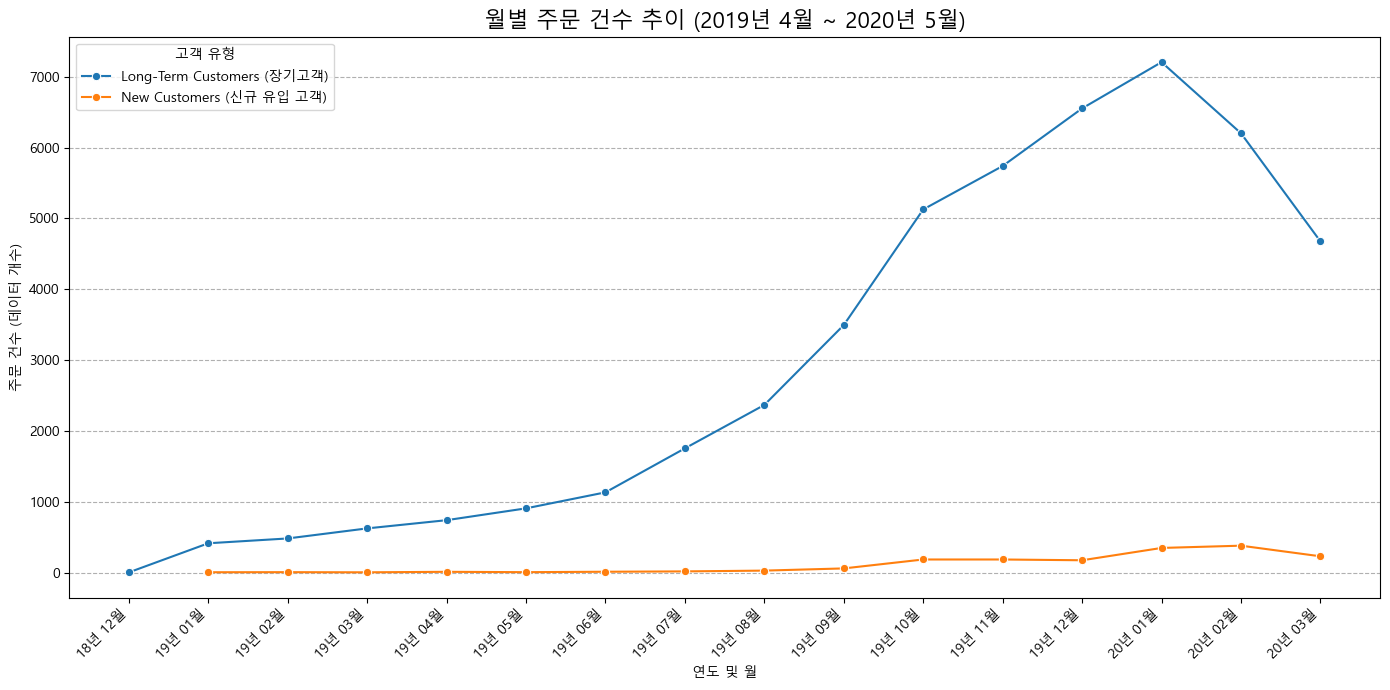

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------
# 윈도우 환경 한글 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
# ----------------------------------------------------

# 파일을 로드합니다.
df = pd.read_csv("pet_food_customer_orders.csv")

# 1. order_payment_date를 datetime 형식으로 변환합니다.
df['order_payment_date'] = pd.to_datetime(df['order_payment_date'], format='%y-%m-%d %H:%M', errors='coerce')

# 2. 장기고객/신규 유입 고객 정의 (주문 기록 횟수 기준)
customer_record_counts = df.groupby('customer_id').size()
# True: 장기고객 (2회 이상), False: 신규 유입 고객 (1회)
customer_type_map = (customer_record_counts > 1).to_dict()
df['customer_type'] = df['customer_id'].map(customer_type_map).replace({True: 'Long-Term Customers (장기고객)', False: 'New Customers (신규 유입 고객)'})

# 3. 월별 주문 건수 집계
df['order_month'] = df['order_payment_date'].dt.to_period('M')
monthly_orders = df.groupby(['order_month', 'customer_type']).size().reset_index(name='order_count')

# 4. 시각화를 위한 x축 포맷 (yy년 MM월)
monthly_orders['month_label'] = monthly_orders['order_month'].dt.strftime('%y년 %m월')
monthly_orders['month_sort'] = monthly_orders['order_month'].astype(str) # 정렬을 위해 문자열로 변환

# 5. 시각화
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_orders,
    x='month_sort',
    y='order_count',
    hue='customer_type',
    marker='o',
    dashes=False
)

# x축 레이블 설정 (정렬된 월 레이블만 사용)
x_labels = monthly_orders.sort_values('order_month')['month_label'].unique()
x_sort_values = monthly_orders.sort_values('order_month')['month_sort'].unique()

plt.xticks(
    ticks=x_sort_values,
    labels=x_labels,
    rotation=45,
    ha='right'
)

plt.title('월별 주문 건수 추이 (2019년 4월 ~ 2020년 5월)', fontsize=16)
plt.xlabel('연도 및 월')
plt.ylabel('주문 건수 (데이터 개수)')
plt.legend(title='고객 유형')
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd

# 파일을 로드합니다.
df = pd.read_csv("pet_food_customer_orders.csv")

# 1. order_payment_date를 datetime 형식으로 변환합니다.
df['order_payment_date'] = pd.to_datetime(df['order_payment_date'], format='%y-%m-%d %H:%M', errors='coerce')

# 2. 장기고객/신규 유입 고객 정의 (주문 기록 횟수 기준)
customer_record_counts = df.groupby('customer_id').size()
customer_type_map = (customer_record_counts > 1).to_dict()
# customer_type 컬럼 생성
df['customer_type'] = df['customer_id'].map(customer_type_map).replace({True: '장기고객', False: '신규 유입 고객'})

# 3. 월별 주문 건수 집계
df['order_month'] = df['order_payment_date'].dt.to_period('M')

# 월별, customer_type별로 그룹화하여 주문 건수(데이터 개수)를 계산합니다.
monthly_orders = df.groupby(['order_month', 'customer_type']).size().reset_index(name='주문_건수')

# 4. 출력 포맷팅 (YYYY년 MM월 형식)
monthly_orders['연도_및_월'] = monthly_orders['order_month'].dt.strftime('%y년 %m월')

# 5. 필요한 컬럼만 선택하고 컬럼명을 최종적으로 변경합니다.
result_df = monthly_orders[['연도_및_월', 'customer_type', '주문_건수']].rename(
    # 'customer_type' 컬럼 이름을 '고객 유형'으로 변경
    columns={'customer_type': '고객 유형'}
)

# 6. 결과를 표 형식으로 출력
print(result_df.to_markdown(index=False, numalign="left", stralign="left"))

| 연도_및_월   | 고객 유형      | 주문_건수   |
|:-------------|:---------------|:------------|
| 18년 12월    | 장기고객       | 2           |
| 19년 01월    | 신규 유입 고객 | 4           |
| 19년 01월    | 장기고객       | 413         |
| 19년 02월    | 신규 유입 고객 | 5           |
| 19년 02월    | 장기고객       | 481         |
| 19년 03월    | 신규 유입 고객 | 3           |
| 19년 03월    | 장기고객       | 623         |
| 19년 04월    | 신규 유입 고객 | 10          |
| 19년 04월    | 장기고객       | 739         |
| 19년 05월    | 신규 유입 고객 | 5           |
| 19년 05월    | 장기고객       | 906         |
| 19년 06월    | 신규 유입 고객 | 11          |
| 19년 06월    | 장기고객       | 1132        |
| 19년 07월    | 신규 유입 고객 | 16          |
| 19년 07월    | 장기고객       | 1753        |
| 19년 08월    | 신규 유입 고객 | 27          |
| 19년 08월    | 장기고객       | 2366        |
| 19년 09월    | 신규 유입 고객 | 58          |
| 19년 09월    | 장기고객       | 3494        |
| 19년 10월    | 신규 유입 고객 | 184         |
| 19년 10월    | 장기고객       | 5126        |
| 19년 11월    | 신규 유입 고객 | 184         |
| 19년 11월    |